In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.graph_objects as go

import plotly.express as px
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/countries-netflix/uk.csv
/kaggle/input/countries-netflix/france.csv
/kaggle/input/countries-netflix/turkey.csv
/kaggle/input/countries-netflix/mexico.csv
/kaggle/input/countries-netflix/spain.csv
/kaggle/input/countries-netflix/japan.csv
/kaggle/input/countries-netflix/south_korea.csv
/kaggle/input/countries-netflix/india.csv
/kaggle/input/countries-netflix/australia.csv
/kaggle/input/countries-netflix/egypt.csv
/kaggle/input/countries-netflix/taiwan.csv
/kaggle/input/countries-netflix/thailand.csv
/kaggle/input/countries-netflix/hongkong.csv
/kaggle/input/countries-netflix/canada.csv
/kaggle/input/netflix-popularity-usa/multiTimeline.csv


In [2]:
netflix=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

netflix.shape

(6234, 12)

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# netflix['date_added']=pd.to_datetime(netflix['date_added']) #To convert date-time into Date Time object from string

netflix['season_count']=netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "" , axis = 1)

netflix.shape

(6234, 13)

# 1.Content Type

In [5]:
group_netflix=netflix.type.value_counts()

# Use `hole` to create a donut-like pie chart

trace=go.Pie(labels=group_netflix.index,values=group_netflix.values,pull=[0.05]) # Actual Data

layout = go.Layout(title="TV Shows VS Movies", height=400, legend=dict(x=1.1, y=1.3)) # layout for data

fig = go.Figure(data=[trace],layout=layout)

fig.update_layout(height=500,width=700)
fig.show()

* Almost 33 percent content on Netflix is **TV SHOWS** rest are **Movies**

# 2.Penetration Over the Years

In [6]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year


movie_per_year=[]

tv_shows_per_year=[]
for i in range(2010,2020):
    h=netflix.loc[(netflix['type']=='Movie') & (netflix.year_added==i)] 
    g=netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added==i)] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

    

trace1 = go.Scatter(x=[i for i in range(2008,2020)],y=movie_per_year,mode='lines+markers',name='Movies')

trace2=go.Scatter(x=[i for i in range(2008,2020)],y=tv_shows_per_year,mode='lines+markers',name='TV Shows')

data=[trace1,trace2]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data, layout=layout)

fig.show()


1. Number of Movies that were added to Netflix platform in **Year 2018 and 2019** combined were more than sum of all movies in All the previous years from 2008 to 2017

2. Number of Movies on Netflix were almost 4 times Than number of TV Shows in 2018 year alone.

3. Session from 2014 to 2015 was the time when the number of Movies on Netflix increased about **4 times**.


# 3. Countries with Most Content
This data conatins countries with Most content exclusively for that country

In [7]:
top_countries=netflix.country.value_counts()

top_countries=top_countries[:15][::-1]

trace=go.Bar(x=top_countries.values,y=top_countries[:15].index,orientation='h',name='',marker=dict(color='#6ad49b'))

data = [trace]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data, layout=layout)
fig.show()

1. Most of the content is released exclusively for USA (even more than sum of top 15 countries)
    This might be beacuse Netflix has been Very Popular in USA from a Long time whereas in other countries like India it's Popularity started to Increase from 2018

## Netflix Popularity in Last 5 Years in USA

In [8]:
from plotly.subplots import make_subplots
multi=pd.read_csv('/kaggle/input/netflix-popularity-usa/multiTimeline.csv')


multi=multi.reset_index()

multi.rename(columns={'Category: All categories':'categories','index':'Dates'},inplace=True)


multi.Dates[1:]=pd.to_datetime(multi.Dates[1:])

trace1=go.Scatter(x=multi.Dates[1:],y=multi.categories[1:],mode='lines+markers',name='Movies')

data=[trace1]

layout = go.Layout(title="Netflix Popularity in USA from LAST 5 Years", height=400,width=1500, legend=dict(x=0.1, y=1.1))

fig = go.Figure(data,layout=layout)

fig.show()





    

In [9]:
countries=['australia','turkey','hongkong','thailand','uk','taiwan','egypt','france','spain','mexico','japan','south_korea','india','canada']
def interest_in_netflix(country):
    australia_netflix=pd.read_csv('/kaggle/input/countries-netflix/'+str(country)+'.csv')

    australia_netflix=australia_netflix.reset_index()

    australia_netflix.rename(columns={'Category: All categories':'categories','index':'Dates'},inplace=True)


    australia_netflix.Dates[1:]=pd.to_datetime(australia_netflix.Dates[1:])

    trace1=go.Scatter(x=australia_netflix.Dates[1:],y=australia_netflix.categories[1:],mode='lines+markers',name='Movies')

    data=[trace1]

    layout = go.Layout(title="Netflix Popularity in "+str(country)+" from LAST 5 Years", height=400,width=1500, legend=dict(x=0.1, y=1.1))

    fig = go.Figure(data,layout=layout)

    fig.show()   
for country in countries:
    interest_in_netflix(country)


https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=netflix

from this website you can see

1. Netflix's popularity has never been less than 40% percent that can be the reason why Netflix release more content exclusively for USA
2. In case of India popularity of Netflix started to rose from January 2018 

In [10]:
def content_over_years(country):
    movie_per_year=[]

    tv_shows_per_year=[]
    for i in range(2008,2020):
        h=netflix.loc[(netflix['type']=='Movie') & (netflix.year_added==i) & (netflix.country==str(country))] 
        g=netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added==i) &(netflix.country==str(country))] 
        movie_per_year.append(len(h))
        tv_shows_per_year.append(len(g))



    trace1 = go.Scatter(x=[i for i in range(2008,2020)],y=movie_per_year,mode='lines+markers',name='Movies')

    trace2=go.Scatter(x=[i for i in range(2008,2020)],y=tv_shows_per_year,mode='lines+markers',name='TV Shows')

    data=[trace1,trace2]

    layout = go.Layout(title="Content added over the years in "+str(country), legend=dict(x=0.1, y=1.1, orientation="h"))

    fig = go.Figure(data, layout=layout)

    fig.show()
countries=['United States','Australia','Turkey','Hong Kong','Thailand',"United Kingdom",'Taiwan',"Egypt",'France','Spain'
          ,'Mexico','Japan','South Korea','India','Canada']

for country in countries:
    content_over_years(str(country))






## OBSERVATIONS:-
* In **ASIAN** continent Netflix increased it's content once they saw a increase in Interest of people towards Netflix examples are :- **Turkey**,**Thailand**,**Taiwan**,**Japan**,**South Korea** ,**India**

* In North America (**Mexico**,**USA** and **CANADA**) netflix was always popular hence Netflix's always Made more content for North America

* In European countries (**France** and **Spain**) Netflix's Popularity started to increase after 2015.

* In **South East Asia** ,**Japan** and **Australian** continent **Tv Shows** went popular after 2018.

* In **France** and **Spain** Tv shows are also getting popular.


# 4. Preferable Movie Duration 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

countries_0_7=['United States','Australia','Turkey','Hong Kong','Thailand',"United Kingdom",'Taiwan']
countrie_7_14=['France','Spain'
          ,'Mexico','Japan','South Korea','India','Canada']
def country_mov_dur(country):
    netflix_country_dur=netflix.loc[(netflix.country==str(country))&(netflix.type=='Movie')].duration[:]


    # # ' minSeaso' will remove ' Season' and ' min'
    netflix_country_dur=netflix_country_dur.apply(lambda x : int(x.strip(' minSeaso')))
    
    return netflix_country_dur

#     sns.kdeplot(netflix_usa,Label='Movie Duration in USA',color='g')

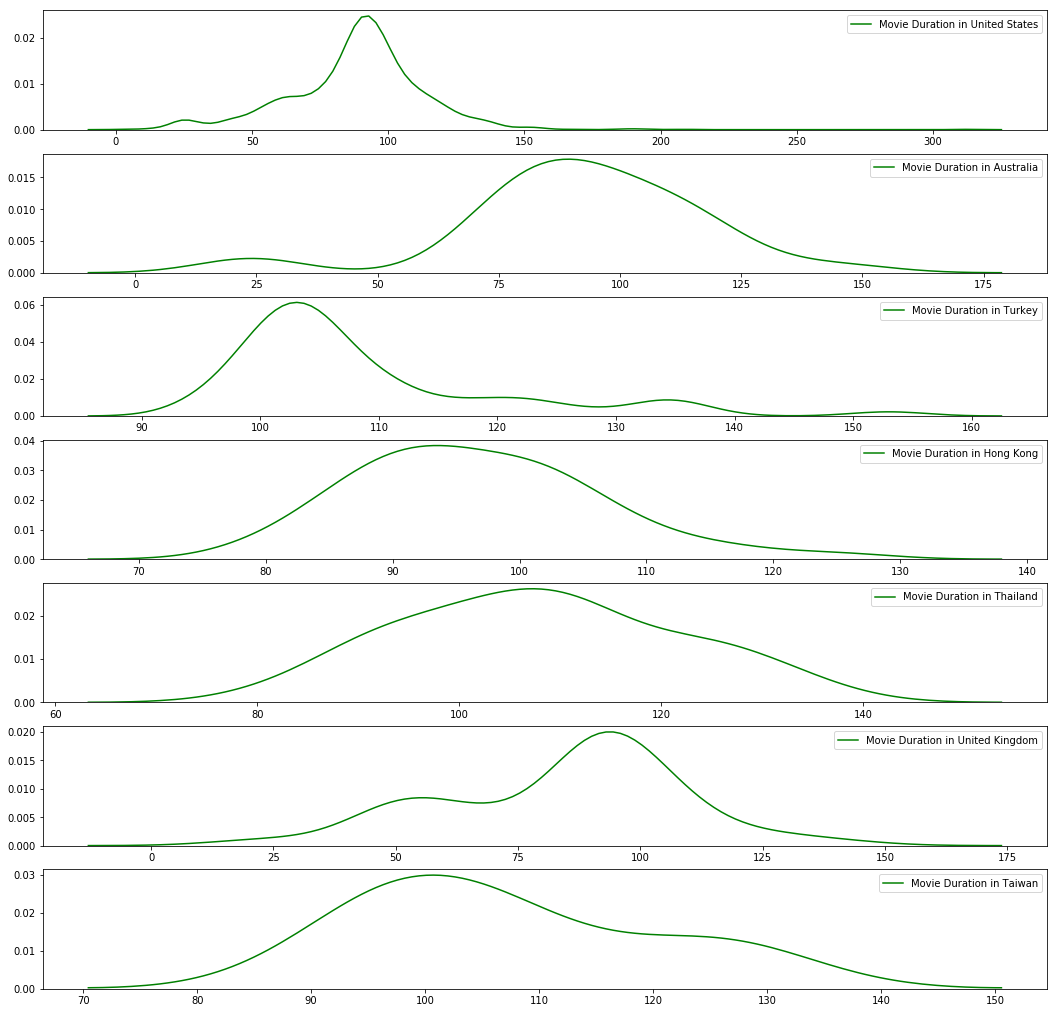

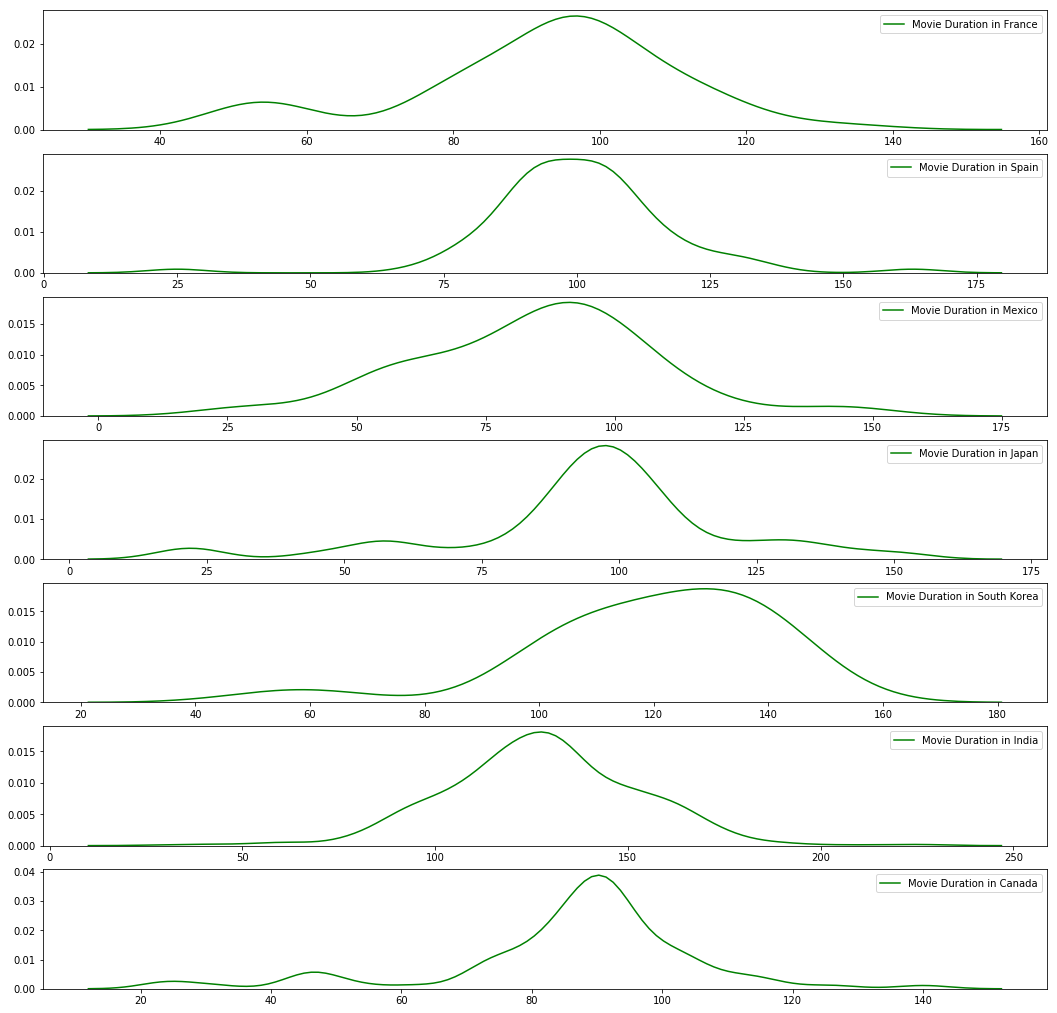

In [12]:
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countries_0_7[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countries_0_7[i]),color='g',ax=axes[i])
        
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countrie_7_14[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countrie_7_14[i]),color='g',ax=axes[i])

1. In **Asian** Countries(**India,South Korea,Taiwan,Hong Kong,Thailand**) and **Australia** Movies with Duration greater than 110 minutes have good number of Viewers

2. In **North America**(**Canada,United States,Mexico**) and **European** countries(**France,Spain United Kingdom**) people like movies between 50 minutes and 110 minutes.


# 5. Top 10 Movie Directors

In [13]:
def country_top_dir(country):
    indian_dir=netflix.loc[(netflix.country==str(country)) & (netflix.type=="Movie")]
    # indian_dir.director.value_counts()[:12]

    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")

    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]

    trace=go.Bar(x=directors.values[:10][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color='#a678de'))
    return trace
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_top_dir(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

